<a href="https://colab.research.google.com/github/MengOonLee/Deep_learning/blob/master/TensorFlow2/Tutorial/Customising_TensorFlow2_models/Data_pipeline/TensorFlow_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Datasets

In this reading notebook, we will take a look at the `tensorflow-datasets` library.

We have previously made use of the `tf.keras.datasets` package, which gave us access to a variety of useful datasets such as the IMDB movie dataset, the CIFAR-100 small image classification dataset, and the MNIST handwritten digits dataset.

The `tensorflow-datasets` library gives us another means of accessing a variety of useful datasets.

## Installation
The `tensorflow-datasets` library is installed independently of TensorFlow itself. It can be installed using pip, by running the following command in a terminal (assuming that `tensorflow` has already been installed):

```pip install tensorflow-datasets ```

In [1]:
%%bash
pip install --no-cache-dir -qU pip wheel
pip install --no-cache-dir -qU numpy pandas matplotlib seaborn scikit-learn
pip install --no-cache-dir -qU tensorflow tensorflow-datasets
pip check

No broken requirements found.


In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')
sns.set(font='DejaVu Sans')

import tensorflow as tf
tf.keras.utils.set_random_seed(42)
tf.get_logger().setLevel('ERROR')

import tensorflow_datasets as tfds

## Listing the Available Datasets
The `list_builders` function can be used to  list the available datasets.

In [2]:
# List available datasets

print(tfds.list_builders())

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'answer_equivalence', 'arc', 'asqa', 'asset', 'assin2', 'bair_robot_pushing_small', 'bccd', 'beans', 'bee_dataset', 'beir', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'ble_wind_field', 'blimp', 'booksum', 'bool_q', 'bucc', 'c4', 'c4_wsrs', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cardiotox', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'cherry_blossoms', 'chexpert', 'cifar10', 'cifar100', 'cifar100_n', 'cifar10_1', 'cifar10_corrupted', 'cifar10_n', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'conll2002', 'conll2003', 'controlled_noisy_web_labels', 'coqa', 'cos_e', 'cosmos_qa', 'covid19', 'covid19sum', 'crema_d

## Loading a Dataset

Loading a particular dataset is straightforward; simply use the `load` function, specifying the `name` and any other keyword arguments. In the example code below, we demonstrate how to load the `kmnist` dataset using the function.

As stated on the documentation page, running the function with `split=None` (the default) returns a dictionary of the splits, with the keys `test` and `train`.

In [3]:
# Load the mnist_corrupted dataset

kmnist  = tfds.load(name="kmnist", split=None)

kmnist_train = kmnist['train']
print(f"train dataset element spec: {kmnist_train.element_spec}")

kmnist_test = kmnist['test']
print(f"test dataset element spec: {kmnist_test.element_spec}")

train dataset element spec: {'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}
test dataset element spec: {'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}


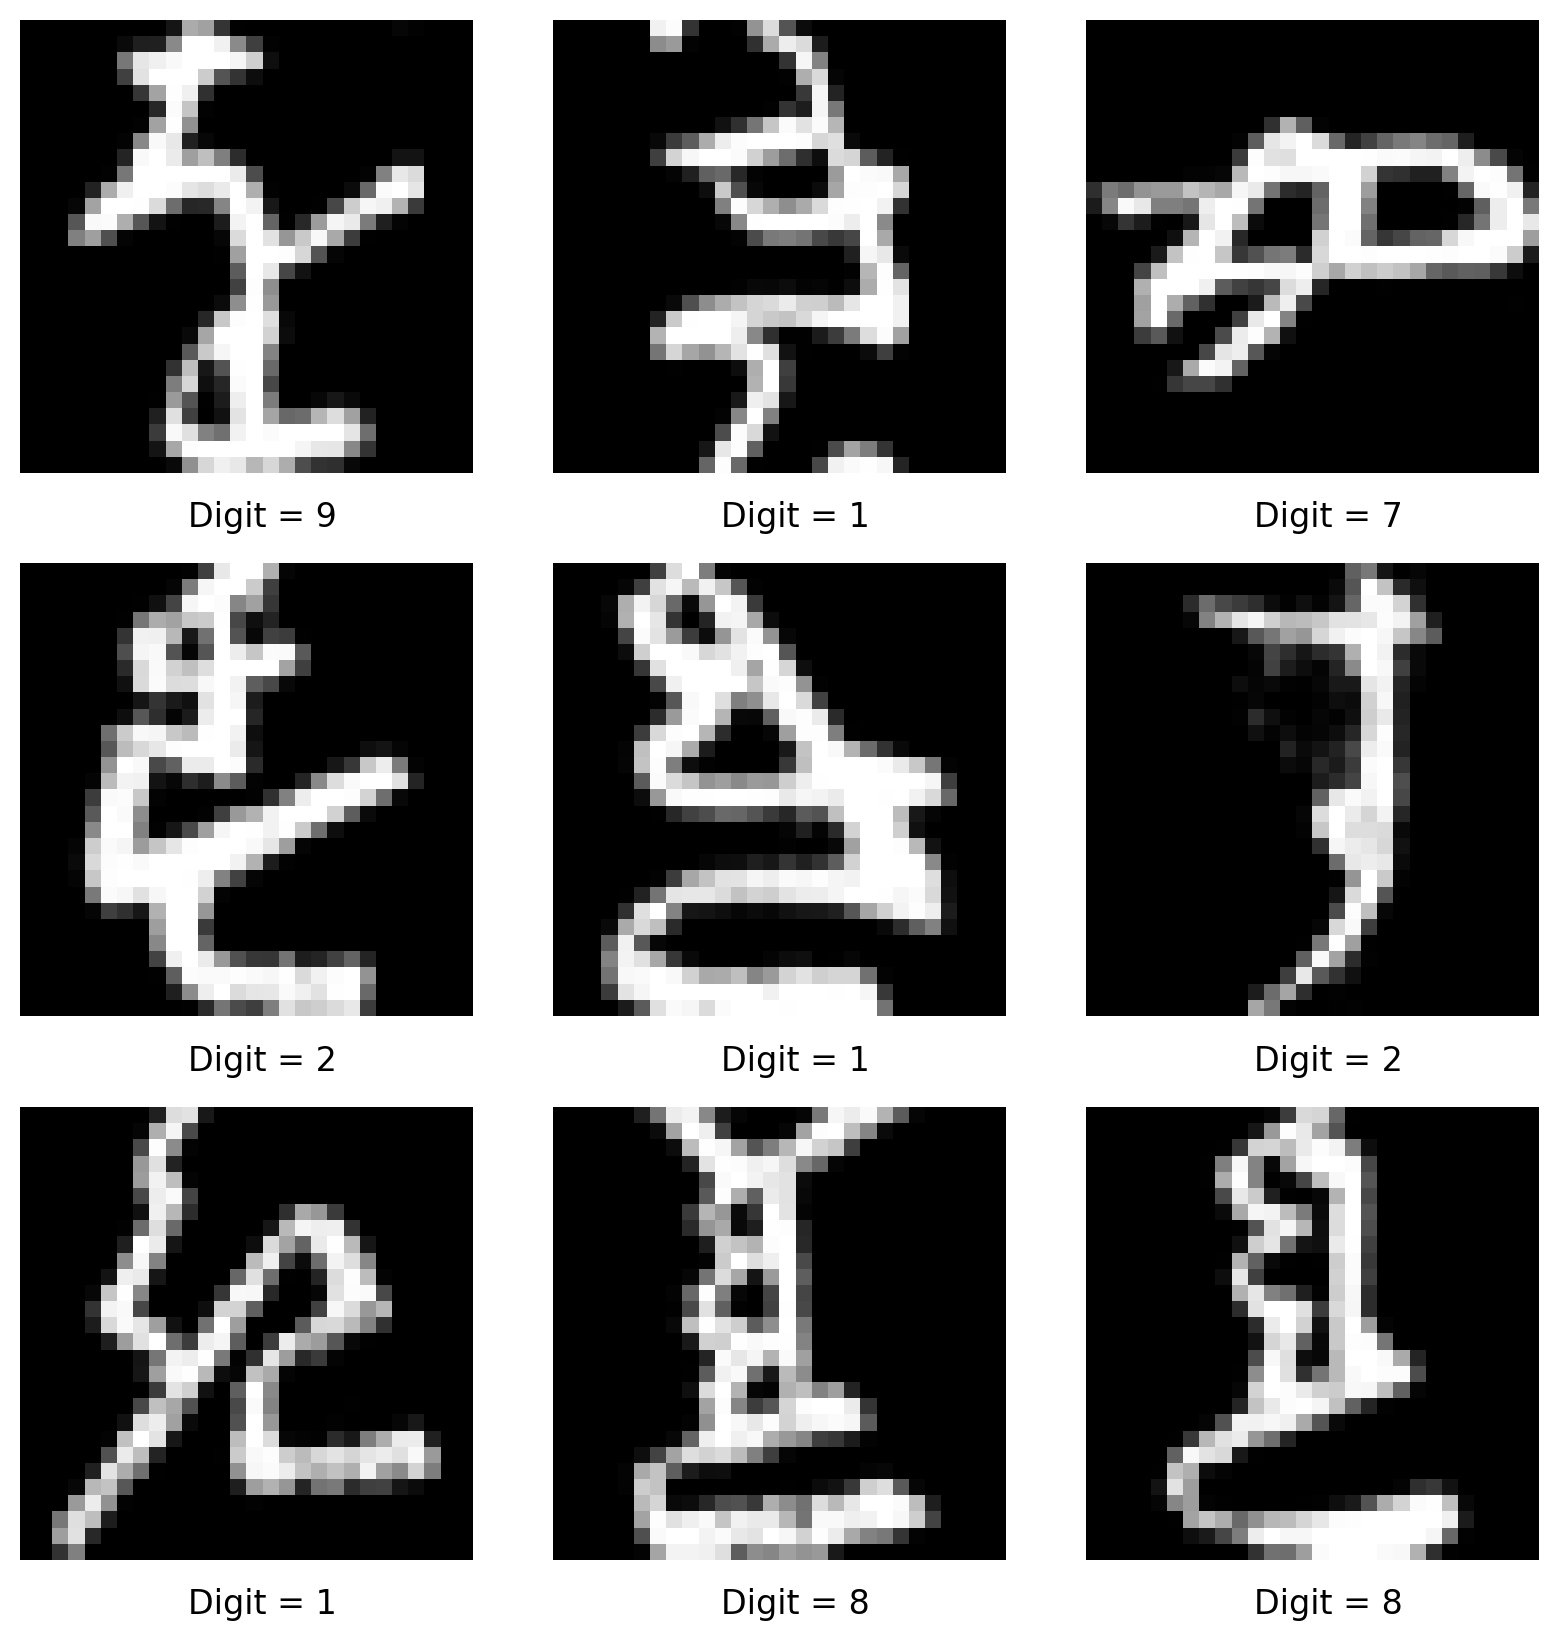

In [4]:
# View some examples from the dataset

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.subplots_adjust(hspace=0.2, wspace=0.1)

for (elem, ax) in zip(kmnist_train, axes.flat):
    image = tf.squeeze(elem['image'])
    label = elem['label']
    
    ax.imshow(X=image, cmap='gray')
    ax.text(x=0.7, y=-0.12, s=f'Digit = {label}',
        ha='right', transform=ax.transAxes, color='black')
    ax.axis('off')
plt.show()

## Further reading and resources
* https://www.tensorflow.org/datasets
* https://www.tensorflow.org/datasets/catalog/overview
* https://wwww.tensorflow.org/datasets/api_docs/python/tfds
* https://tensorflow.org/datasets/api_docs/python/tfds/load